In [1]:
# Import basics
import sys, os
import numpy as np

from scipy import stats, ndimage, interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plotting Settings
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20


# Raw and Calibrated Observational Data

## Load and Downbin the Raw Data
The Effelsberg data are saved in `../data/Effelsberg_Data/` as `numpy` dictionaries `LBand.npz` and `SBand.npz`. Each dictionary contains the time integrated data at each frequency channel in both the ON and OFF Positions. Additionally, we perform a three-fold downbinning to the frequency resolution of our fiducial analysis.

In [2]:
def downbin(arr, downsample = 3, shift = 0):
    arr = np.copy(arr[0:])
    
    max_index = len(arr) / downsample * downsample
    num_intervals = len(arr) / downsample
    
    return np.mean(arr[:max_index].reshape(num_intervals, downsample), axis = 1)

In [3]:
data = np.load('../data/Effelsberg_Data/LBand.npz')['arr_0'].item()

LBand_Freqs = downbin(data['Freqs']) # the frequency channel, GHz
LBand_On_Data = downbin(data['On_Data']) # the ON-Postion measurement, Raw Antenna Counts
LBand_Off_Data = downbin(data['Off_Data']) # the OFF-Postion measurement, Raw Antenna Counts 

data = np.load('../data/Effelsberg_Data/SBand.npz')['arr_0'].item()

SBand_Freqs = downbin(data['Freqs']) # the frequency channel, GHz
SBand_On_Data = downbin(data['On_Data']) # the ON-Postion measurement, Raw Antenna Counts
SBand_Off_Data = downbin(data['Off_Data']) # the OFF-Postion measurement, Raw Antenna Counts 

## Reduce the Data

The raw data is provided at frequencies outside the data-taking range for each observation. Following Effelsberg documentation, the LBand data should be reduced to the frequency range `1.27 - 1.45 GHz` and the SBand data to `2.4 - 2.7 GHz`. 

In [4]:
LBand_Locs = np.where(np.logical_and(LBand_Freqs >= 1.27, LBand_Freqs <= 1.45))
SBand_Locs = np.where(np.logical_and(SBand_Freqs >= 2.4, SBand_Freqs <= 2.7))

LBand_Freqs = LBand_Freqs[LBand_Locs]
LBand_On_Data = LBand_On_Data[LBand_Locs]
LBand_Off_Data = LBand_Off_Data[LBand_Locs]

SBand_Freqs = SBand_Freqs[SBand_Locs]
SBand_On_Data = SBand_On_Data[SBand_Locs]
SBand_Off_Data = SBand_Off_Data[SBand_Locs]

## Obtain the Data Calibrations

A frequency-dependent calibration is obtained by normalizing the data to an expected flux density spectrum at the Galactic Center. We emphasize that this calibration is only applied as a final rescaling to our analysis results and for visualization purposes.

In [5]:
Cal_Freqs, Cal_FD = np.load('../data/Effelsberg_Data/Eff_Cal.npy')

SBand_Cal = np.interp(SBand_Freqs, Cal_Freqs, Cal_FD) / ndimage.median_filter(SBand_On_Data, size = 201)
LBand_Cal = np.interp(LBand_Freqs, Cal_Freqs, Cal_FD) / ndimage.median_filter(LBand_On_Data, size = 201)

## Plot the Calibrated Flux Density Spectra

/sw/lsa/centos7/python-anaconda2/2019.03/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


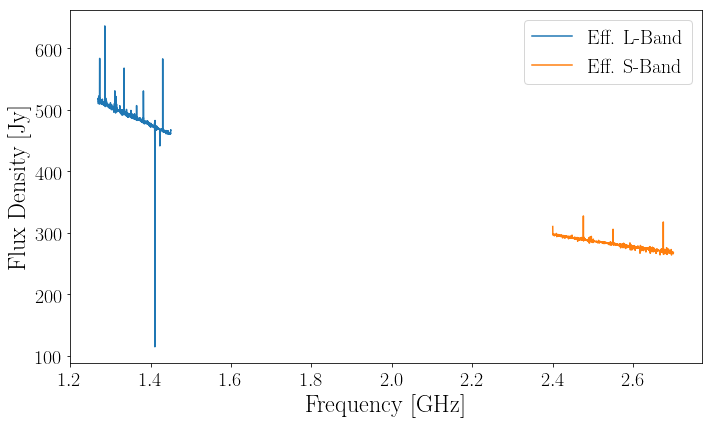

In [6]:
mpl.rcParams['figure.figsize'] = 10, 6


plt.plot(LBand_Freqs, LBand_Cal * LBand_On_Data, label = 'Eff. L-Band')
plt.plot(SBand_Freqs, SBand_Cal * SBand_On_Data, label = 'Eff. S-Band')

plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux Density [Jy]')

plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()